# Exploratory Analysis & Classification

By: Oscar Ko

This notebook is created for initial data preperation on this dataset from Stanford.

https://data.stanford.edu/hcmst2017

---
---

# Imports and Data

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("data/df_renamed.csv")

print(df.shape, "\n")

df.info(verbose=True)

(2844, 83) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 83 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2844 non-null   int64  
 1   ID                                2844 non-null   int64  
 2   ageGap                            2844 non-null   float64
 3   ageWhenMet                        2810 non-null   float64
 4   attendReligiousServiceFreq        2844 non-null   object 
 5   employmentStatus                  2844 non-null   object 
 6   genderSubjectAttractedTo          2837 non-null   object 
 7   houseType                         2844 non-null   object 
 8   householdIncome                   2844 non-null   object 
 9   householdSize                     2844 non-null   int64  
 10  interracial                       2822 non-null   object 
 11  isHispanic                        2844 non-null   bool  

# Test-Train Stratified Split

- Stratified split to ensure equal proportions of all labels in both sets.
- Use on "relationshipQuality_isGood"

**First drop the other two outcome labels, leaving just "relationshipQuality_isGood"**

In [2]:
# Remove "relationshipQuality" and "relationshipQuality_num"

df_copy = df.copy().drop(["relationshipQuality", "relationshipQuality_num"], axis=1)

success1 = "relationshipQuality_num" not in df_copy.columns
success2 = "relationshipQuality" not in df_copy.columns

print("Sucessfully removed both columns?", success1 & success2)

Sucessfully removed both columns? True


**Train-Test Stratified Split**

In [3]:
# import package
from sklearn.model_selection import train_test_split

# declare our X inputs and y outcomes
X = df_copy.drop("relationshipQuality_isGood", axis=1)
y = df_copy["relationshipQuality_isGood"]


# stratify split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify=y, 
                                                    test_size=0.2,
                                                    random_state=42)

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)

print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

print("\n")
print("y_train class proportions: \n", y_train.value_counts(normalize=True))

print("\n")
print("y_test class proportions: \n", y_test.value_counts(normalize=True))

X_train.shape =  (2275, 80)
X_test.shape =  (569, 80)
y_train.shape =  (2275,)
y_test.shape =  (569,)


y_train class proportions: 
 1    0.90989
0    0.09011
Name: relationshipQuality_isGood, dtype: float64


y_test class proportions: 
 1    0.910369
0    0.089631
Name: relationshipQuality_isGood, dtype: float64


### X_train Summary Statistics

In [4]:
X_train.describe()

,Unnamed: 0,ID,ageGap,ageWhenMet,householdSize,met_YearFraction,met_to_shipStart_diff,moveIn_YearFraction,numOfHouseMembersAges0to1,numOfHouseMembersAges13to17,...,numOfTimesMarried,numRelativesSeePerMonth,partnerAge,partnerEduc_years,partnerMotherEduc_years,shipStart_YearFraction,shipStart_to_moveIn_YearFraction,subjectAge,subjectEduc_years,subjectMotherEduc_years
count,2275.000000,2.275000e+03,2275.000000,2250.000000,2275.000000,2250.000000,2200.000000,1930.000000,2275.000000,2275.000000,...,2269.000000,2262.000000,2275.000000,2273.000000,2246.000000,2208.000000,1889.000000,2275.000000,2275.000000,2271.000000
mean,1785.339341,2.175449e+06,4.370110,26.171111,2.761319,1994.377522,1.617764,1995.512353,0.056703,0.178462,...,1.090789,3.480106,48.698901,14.235812,12.366207,1996.054011,1.932019,49.288791,14.100220,12.343901
std,1010.610098,6.470539e+05,6.120972,11.241342,1.437559,16.889129,4.435628,15.874591,0.253112,0.497816,...,0.767304,5.123965,16.493099,2.435172,3.121022,16.609877,2.712029,16.323754,2.528392,3.128096
min,1.000000,5.300100e+04,0.000000,0.000000,1.000000,1939.208400,0.000000,1944.375000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,1942.375000,0.000000,18.000000,0.000000,0.000000
25%,914.500000,1.811954e+06,1.000000,18.000000,2.000000,1981.458400,0.000000,1983.625000,0.000000,0.000000,...,1.000000,0.000000,35.000000,12.000000,12.000000,1983.625000,0.333374,35.000000,12.000000,12.000000
50%,1807.000000,2.279341e+06,3.000000,23.000000,2.000000,1997.791600,0.166748,1998.458400,0.000000,0.000000,...,1.000000,2.000000,49.000000,13.000000,12.000000,1999.541600,1.083252,51.000000,13.000000,12.000000
75%,2653.000000,2.762445e+06,6.000000,31.000000,4.000000,2008.708400,1.083283,2009.458400,0.000000,0.000000,...,1.000000,5.000000,61.000000,16.000000,14.000000,2010.291600,2.416626,62.000000,16.000000,14.000000
max,3508.000000,2.969933e+06,86.000000,84.000000,10.000000,2017.541600,54.750000,2017.541600,2.000000,3.000000,...,4.000000,50.000000,95.000000,20.000000,20.000000,2017.875000,31.500000,93.000000,20.000000,20.000000


### Check the training set for missing values

In [5]:
# combine the X_train and y_train into a dataframe
training_set = pd.concat([X_train, y_train], axis=1)

# check records and features
print(training_set.shape)

(2275, 81)


In [6]:
# Check for any missing values
print(training_set.isnull().values.any())

# Check number of missing values
print("Count of na's:", training_set.isnull().values.sum())

# Check number of rows with missing values
print("Cases with missing values:", training_set.isna().any(axis=1).sum())

True
Count of na's: 2252
Cases with missing values: 469


In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

training_set.isna().sum()

Unnamed: 0                            0
ID                                    0
ageGap                                0
ageWhenMet                           25
attendReligiousServiceFreq            0
employmentStatus                      0
genderSubjectAttractedTo              7
houseType                             0
householdIncome                       0
householdSize                         0
interracial                          19
isHispanic                            0
isLivingTogether                      0
isMarried                             0
isMetroArea                           0
metAs_coworkers                      49
metAs_customerAndClient              49
metAs_workNeighbors                  49
metIn_church                         49
metIn_college                        49
metIn_military                       49
metIn_privateParty                   49
metIn_public                         49
metIn_restaurantOrBar                49
metIn_school                         49


### Remove unneeded columns

Columns related to couples first moving in together have over 300 missing values. This is due to not all couples moving in together. Since 300 is a large chunk of our 2275 records, I will remove these columns.

In [8]:
columns_to_remove = [
    "moveIn_YearFraction",
    "shipStart_to_moveIn_YearFraction",
    "Unnamed: 0", # Also Remove column with no useful info
    "ID" # Also Remove column with no useful info
]

# anything done to the training set has to be done to the testing set
training_set.drop(columns_to_remove, axis=1, inplace=True)
X_train.drop(columns_to_remove, axis=1, inplace=True)
X_test.drop(columns_to_remove, axis=1, inplace=True)

# Recheck the na's
training_set.isna().sum()

ageGap                               0
ageWhenMet                          25
attendReligiousServiceFreq           0
employmentStatus                     0
genderSubjectAttractedTo             7
houseType                            0
householdIncome                      0
householdSize                        0
interracial                         19
isHispanic                           0
isLivingTogether                     0
isMarried                            0
isMetroArea                          0
metAs_coworkers                     49
metAs_customerAndClient             49
metAs_workNeighbors                 49
metIn_church                        49
metIn_college                       49
metIn_military                      49
metIn_privateParty                  49
metIn_public                        49
metIn_restaurantOrBar               49
metIn_school                        49
metIn_voluntaryOrg                  49
metOn_blindDate                     49
metOn_businessTrip       

In [9]:
# Check all cases and columns
print(training_set.shape)

# Check number of rows with missing values
print("Cases with missing values:", training_set.isna().any(axis=1).sum())

(2275, 77)
Cases with missing values: 183


Since 183 records is not too much compared to the 2275 in total, I will op to remove these missing values.

In [10]:
# Dropping NA values

def cleanDatasets(X_data, y_data):
    
    cols_with_na = X_data.columns[X_data.isna().any()].tolist()
    
    for col in cols_with_na:
        
        indexes = X_data[col].notna()
        X_data = X_data[indexes]
        y_data = y_data[indexes]
    
    # filter odd partner age cases
    age_filter = X_data["partnerAge"] > 5
    X_data = X_data[age_filter]
    y_data = y_data[age_filter]
    
    return X_data, pd.DataFrame(y_data)

# anything done to the training set has to be done to the testing set        
X_train, y_train = cleanDatasets(X_train, y_train)
X_test, y_test = cleanDatasets(X_test, y_test)


# recombine training sets
training_set = pd.concat([X_train, y_train], axis=1)


# Check all cases and columns
print(training_set.shape)

# Check number of rows with missing values
print("Cases with missing values:", training_set.isna().any(axis=1).sum())

(2086, 77)
Cases with missing values: 0


---
---
# Exploratory Data Analysis

In [11]:
training_set.describe()

,ageGap,ageWhenMet,householdSize,met_YearFraction,met_to_shipStart_diff,numOfHouseMembersAges0to1,numOfHouseMembersAges13to17,numOfHouseMembersAges18toOver,numOfHouseMembersAges2to5,numOfHouseMembersAges6to12,numOfTimesMarried,numRelativesSeePerMonth,partnerAge,partnerEduc_years,partnerMotherEduc_years,shipStart_YearFraction,subjectAge,subjectEduc_years,subjectMotherEduc_years,relationshipQuality_isGood
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,4.057047,26.082934,2.743528,1994.269459,1.640859,0.057047,0.173538,2.196069,0.120805,0.196069,1.089645,3.441515,49.054171,14.272531,12.370566,1995.909358,49.318313,14.157239,12.409396,0.913231
std,4.683775,11.155295,1.398147,16.799039,4.469024,0.255596,0.494177,0.872936,0.402365,0.550913,0.763758,5.097531,16.120215,2.449912,3.104074,16.569211,16.187994,2.502318,3.058297,0.281564
min,0.000000,0.000000,1.000000,1939.208400,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,1942.375000,18.000000,0.000000,0.000000,0.000000
25%,1.000000,18.000000,2.000000,1981.312450,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,35.000000,12.000000,12.000000,1983.375000,35.000000,12.000000,12.000000,1.000000
50%,3.000000,23.000000,2.000000,1997.625000,0.166748,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,50.000000,14.000000,12.000000,1999.333300,51.000000,13.000000,12.000000,1.000000
75%,5.000000,31.000000,4.000000,2008.604150,1.083374,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,5.000000,62.000000,16.000000,14.000000,2010.104150,62.000000,16.000000,14.000000,1.000000
max,45.000000,84.000000,10.000000,2017.541600,54.750000,2.000000,3.000000,9.000000,6.000000,4.000000,4.000000,50.000000,95.000000,20.000000,20.000000,2017.875000,93.000000,20.000000,20.000000,1.000000


In [12]:
# import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Correlation Matrix Heatmap (Columns 0 to 45)

<AxesSubplot:>

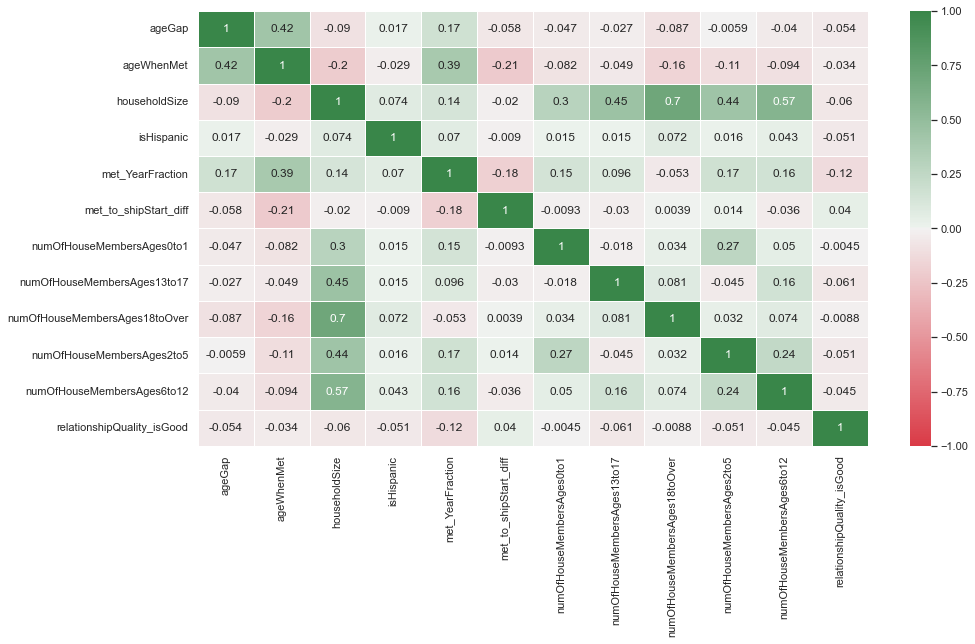

In [13]:
# limit the number of columns
corr_df = training_set.iloc[:,0:45]
corr_df["relationshipQuality_isGood"] = training_set["relationshipQuality_isGood"]

# calculate the correlation matrix
corr_matrix = corr_df.corr()

# set larger plot size
sns.set(rc = {'figure.figsize':(15,8)})

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)

# plot the heatmap
sns.heatmap(corr_matrix,
            annot=True,
            cmap=cmap,
            vmin=-1, 
            vmax=1,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            center=0,
            linewidths=.5)

### Correlation Matrix Heatmap (Columns 45 to 90)

<AxesSubplot:>

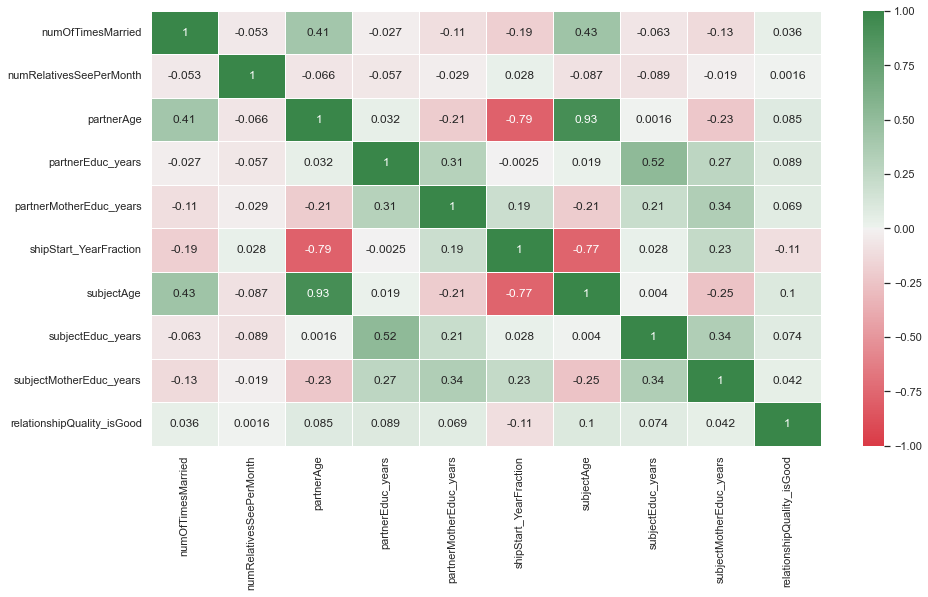

In [14]:
# limit the number of columns
corr_df = training_set.iloc[:,45:90]
corr_df["relationshipQuality_isGood"] = training_set["relationshipQuality_isGood"]

# calculate the correlation matrix
corr_matrix = corr_df.corr()

# set larger plot size
sns.set(rc = {'figure.figsize':(15,8)})

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)

# plot the heatmap
sns.heatmap(corr_matrix,
            annot=True,
            cmap=cmap,
            vmin=-1, 
            vmax=1,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            center=0,
            linewidths=.5)

### Top 10 positive correlations

In [15]:
correlations = training_set.corr()

s = correlations.unstack()

sorted_vals = s.sort_values(kind="quicksort", ascending=False)

col_count = len(correlations)

top_rows = 15

print(sorted_vals[0 + col_count: top_rows + col_count])

met_YearFraction               shipStart_YearFraction           0.964212
shipStart_YearFraction         met_YearFraction                 0.964212
partnerAge                     subjectAge                       0.926556
subjectAge                     partnerAge                       0.926556
householdSize                  numOfHouseMembersAges18toOver    0.697480
numOfHouseMembersAges18toOver  householdSize                    0.697480
numOfHouseMembersAges6to12     householdSize                    0.573415
householdSize                  numOfHouseMembersAges6to12       0.573415
partnerEduc_years              subjectEduc_years                0.516242
subjectEduc_years              partnerEduc_years                0.516242
householdSize                  numOfHouseMembersAges13to17      0.450400
numOfHouseMembersAges13to17    householdSize                    0.450400
householdSize                  numOfHouseMembersAges2to5        0.435339
numOfHouseMembersAges2to5      householdSize       

### Top 15 negative correlations

In [16]:
correlations = training_set.corr()

s = correlations.unstack()

sorted_vals = s.sort_values(kind="quicksort", ascending=True)

col_count = len(correlations)

top_rows = 10

print(sorted_vals[0 + col_count: top_rows + col_count])

partnerAge                  numOfHouseMembersAges2to5    -0.224320
                            numOfHouseMembersAges6to12   -0.212035
numOfHouseMembersAges6to12  partnerAge                   -0.212035
met_to_shipStart_diff       ageWhenMet                   -0.211593
ageWhenMet                  met_to_shipStart_diff        -0.211593
numOfTimesMarried           met_YearFraction             -0.211282
met_YearFraction            numOfTimesMarried            -0.211282
numOfHouseMembersAges0to1   subjectAge                   -0.210028
subjectAge                  numOfHouseMembersAges0to1    -0.210028
                            partnerMotherEduc_years      -0.209677
dtype: float64


### Top 10 Positive Correlations with RelationshipQuality_isGood

In [17]:
label_correlations = training_set.corr()["relationshipQuality_isGood"]

sorted_vals = label_correlations.sort_values(kind="quicksort", ascending=False)

print(sorted_vals[0: 10])

relationshipQuality_isGood    1.000000
subjectAge                    0.099504
partnerEduc_years             0.088878
partnerAge                    0.085148
subjectEduc_years             0.074172
partnerMotherEduc_years       0.069184
subjectMotherEduc_years       0.041551
met_to_shipStart_diff         0.039575
numOfTimesMarried             0.036188
numRelativesSeePerMonth       0.001642
Name: relationshipQuality_isGood, dtype: float64


### Top 10 Negative Correlations with RelationshipQuality_isGood

In [18]:
label_correlations = training_set.corr()["relationshipQuality_isGood"]

sorted_vals = label_correlations.sort_values(kind="quicksort", ascending=True)

print(sorted_vals[0: 10])

met_YearFraction                -0.118335
shipStart_YearFraction          -0.109320
numOfHouseMembersAges13to17     -0.060631
householdSize                   -0.060212
ageGap                          -0.053706
numOfHouseMembersAges2to5       -0.051370
isHispanic                      -0.050636
numOfHouseMembersAges6to12      -0.044869
ageWhenMet                      -0.033898
numOfHouseMembersAges18toOver   -0.008804
Name: relationshipQuality_isGood, dtype: float64


array([[<AxesSubplot:title={'center':'ageGap'}>,
        <AxesSubplot:title={'center':'ageWhenMet'}>,
        <AxesSubplot:title={'center':'householdSize'}>,
        <AxesSubplot:title={'center':'met_YearFraction'}>],
       [<AxesSubplot:title={'center':'met_to_shipStart_diff'}>,
        <AxesSubplot:title={'center':'numOfHouseMembersAges0to1'}>,
        <AxesSubplot:title={'center':'numOfHouseMembersAges13to17'}>,
        <AxesSubplot:title={'center':'numOfHouseMembersAges18toOver'}>],
       [<AxesSubplot:title={'center':'numOfHouseMembersAges2to5'}>,
        <AxesSubplot:title={'center':'numOfHouseMembersAges6to12'}>,
        <AxesSubplot:title={'center':'numOfTimesMarried'}>,
        <AxesSubplot:title={'center':'numRelativesSeePerMonth'}>],
       [<AxesSubplot:title={'center':'partnerAge'}>,
        <AxesSubplot:title={'center':'partnerEduc_years'}>,
        <AxesSubplot:title={'center':'partnerMotherEduc_years'}>,
        <AxesSubplot:title={'center':'shipStart_YearFraction'}>]

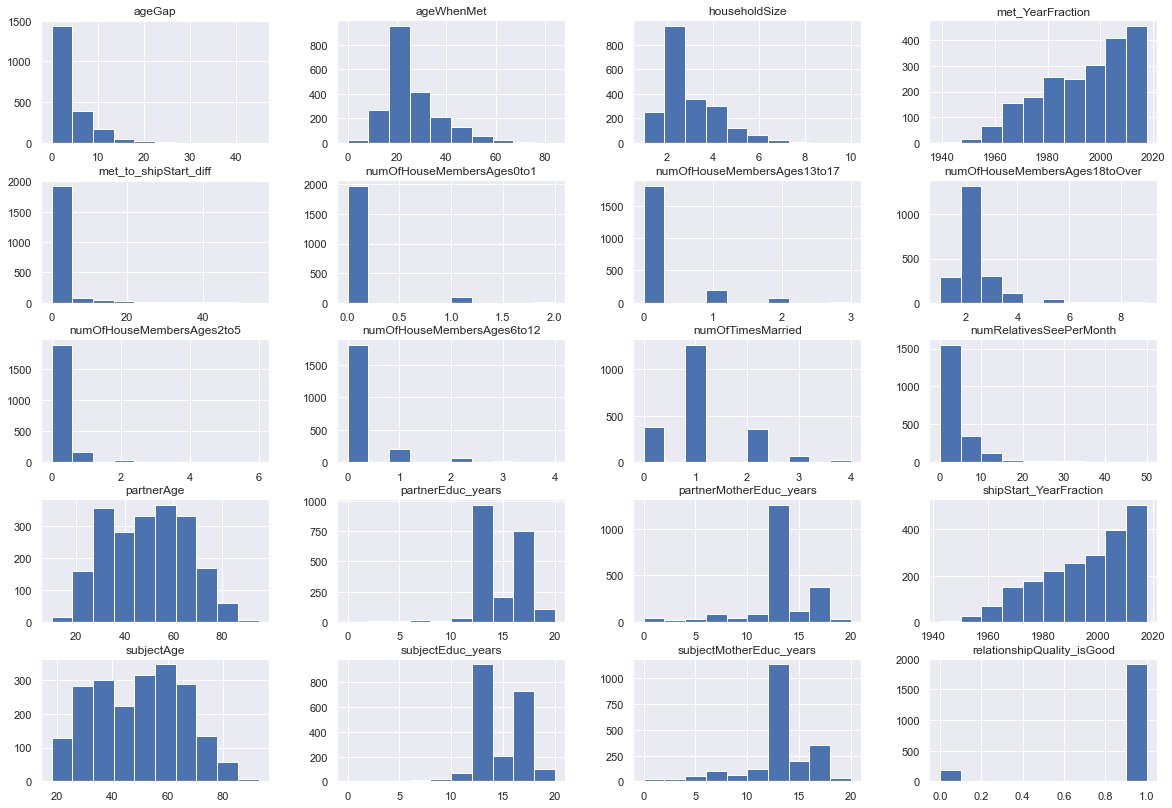

In [19]:
training_set.hist(figsize=(20,14))

### Pairplots with top positive correlations with outcome label

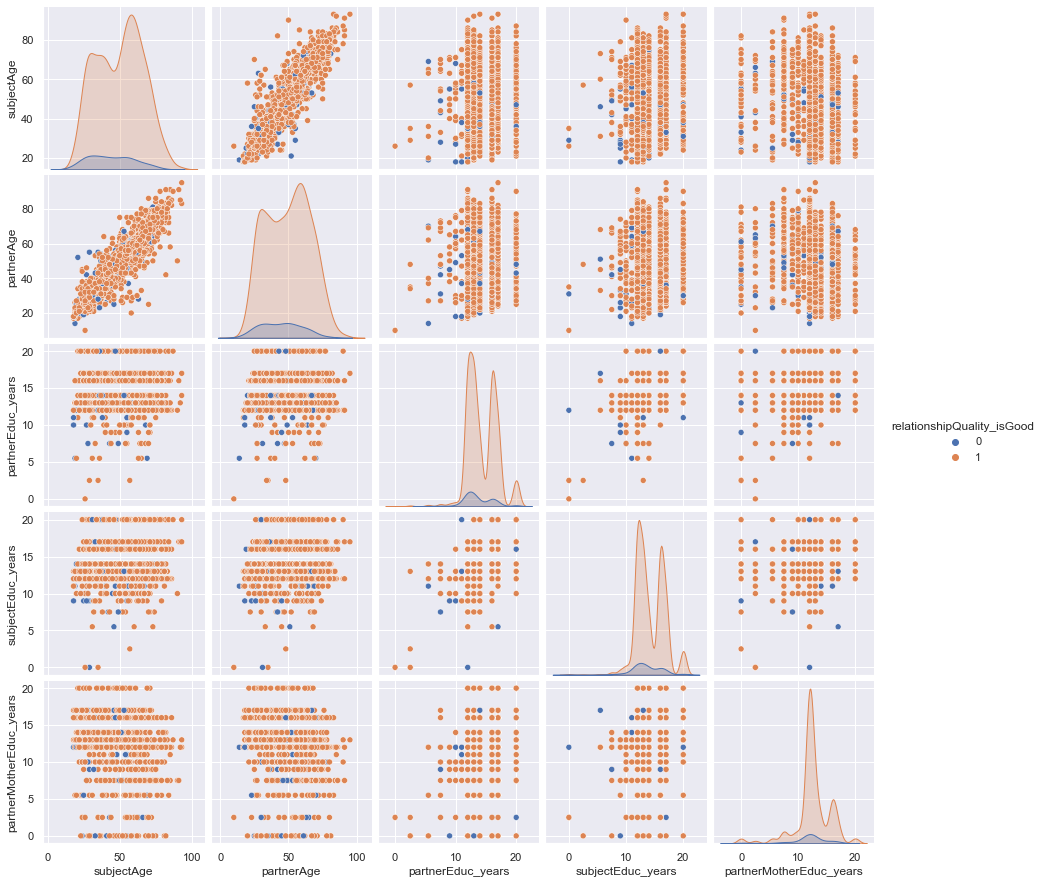

In [20]:
features = ["relationshipQuality_isGood",
           "subjectAge",
            "partnerAge",
            "partnerEduc_years",
            "subjectEduc_years",
            "partnerMotherEduc_years"
           ]

sns.pairplot(training_set[features],
            hue="relationshipQuality_isGood")

### Pairplots with top negative correlations with outcome label

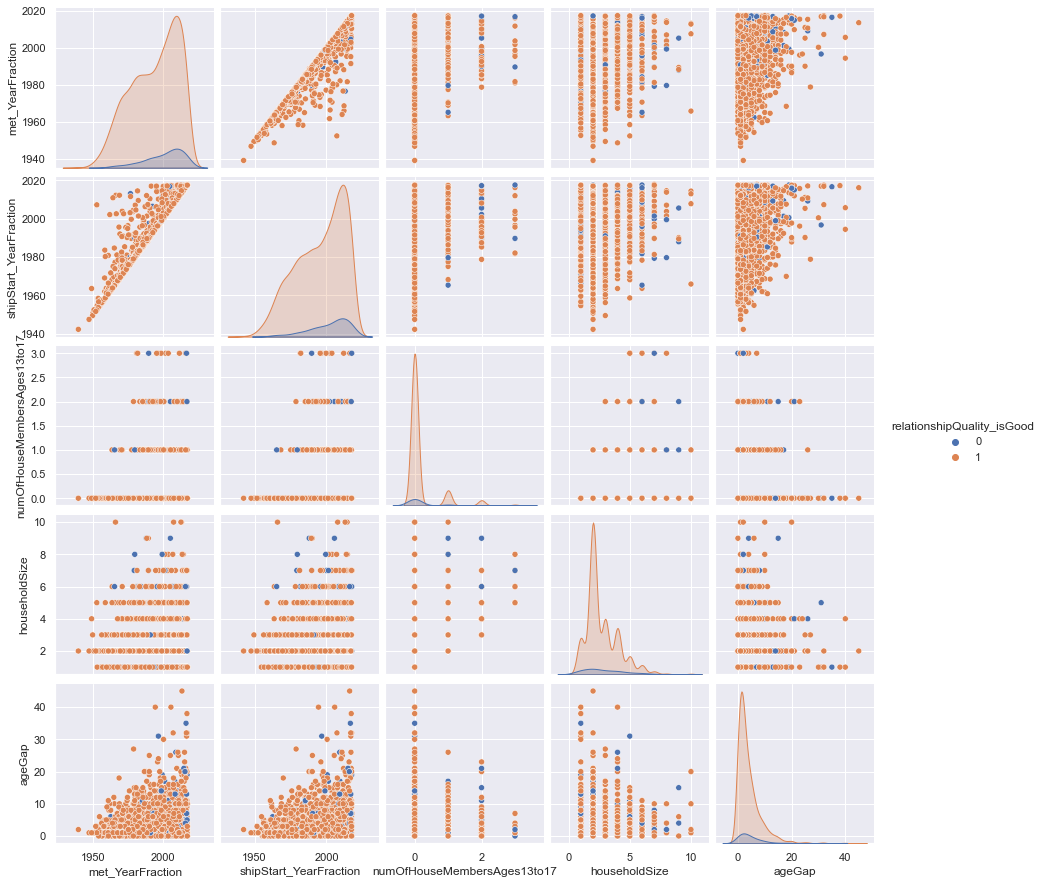

In [21]:
features = ["relationshipQuality_isGood",
            "met_YearFraction",
            "shipStart_YearFraction",
            "numOfHouseMembersAges13to17",
            "householdSize" ,
            "ageGap"
           ]

sns.pairplot(training_set[features],
            hue="relationshipQuality_isGood")